# Data 620 - Week5 Group Project #3

# Team Members
* # Ali Ahmed, Nilsa Bermudez, Ursula Podosenin

https://youtu.be/8aZzjlJgv_8

# Overview

Using any of the three classifiers described in chapter 6 of Natural Language Processing with Python, and any features you can think of, build the best name gender classifier you can. 

Begin by splitting the Names Corpus into three subsets: 500 words for the test set, 500 words for the dev-test set, and the remaining 6900 words for the training set. Then, starting with the example name gender classifier, make incremental improvements. Use the dev-test set to check your progress. Once you are satisfied with your classifier, check its final performance on the test set.

How does the performance on the test set compare to the performance on the dev-test set?
Is this what you'd expect?


In [1]:
# Import libraries needed
import random
import nltk
from nltk.corpus import names
from nltk.classify import apply_features
from nltk.classify import NaiveBayesClassifier
nltk.download('names')

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\nilsa\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!


True

In [2]:
# Label all the names with gender
labeled_names = [(name, 'male') for name in names.words('male.txt')] + \
                [(name, 'female') for name in names.words('female.txt')]

# Shuffle the dataset here
random.shuffle(labeled_names)

# Split the data into training (6900), dev-test (500), and test (500) as per the assignment
train_set = labeled_names[1000:]
devtest_set = labeled_names[500:1000]
test_set = labeled_names[:500]


**Start with a few features**

In [3]:
def gender_featuresfirstlast(word):
    featuresfirstlast = {
        'first_letter': word[0].lower(),
        'last_letter': word[-1].lower(),
        'last_two': word[-2:].lower()
    }
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        featuresfirstlast[f'count_{letter}'] = word.lower().count(letter)
    return featuresfirstlast

In [4]:
train_feats1 = [(gender_featuresfirstlast(n), g) for (n, g) in train_set]
devtest_feats1 = [(gender_featuresfirstlast(n), g) for (n, g) in devtest_set]
test_feats1 = [(gender_featuresfirstlast(n), g) for (n, g) in test_set]

classifier = NaiveBayesClassifier.train(train_feats1)


In [5]:
# Here is the Accuracy on dev-test and test sets
print("Dev-Test Accuracy1:", nltk.classify.accuracy(classifier, devtest_feats1))
print("Test Accuracy1:", nltk.classify.accuracy(classifier, test_feats1))

# Show informative features
classifier.show_most_informative_features(10)

Dev-Test Accuracy1: 0.796
Test Accuracy1: 0.8
Most Informative Features
                last_two = 'na'           female : male   =     93.9 : 1.0
                last_two = 'la'           female : male   =     71.1 : 1.0
             last_letter = 'k'              male : female =     64.6 : 1.0
             last_letter = 'a'            female : male   =     36.4 : 1.0
                last_two = 'ia'           female : male   =     36.3 : 1.0
                last_two = 'sa'           female : male   =     35.2 : 1.0
                last_two = 'ra'           female : male   =     34.4 : 1.0
                last_two = 'ta'           female : male   =     31.7 : 1.0
                last_two = 'rd'             male : female =     29.1 : 1.0
                last_two = 'us'             male : female =     26.7 : 1.0


In [6]:
errors = []
for (name, gender) in devtest_set:
    guess = classifier.classify(gender_featuresfirstlast(name))
    if guess != gender:
        errors.append((gender, guess, name))

print("\n10 misclassified names:")
for (gender, guess, name) in sorted(errors[:10]):  
    print(f"Name: {name:<20} True: {gender:<7} Predicted: {guess}")


10 misclassified names:
Name: Brook                True: female  Predicted: male
Name: Darsey               True: female  Predicted: male
Name: Hildagard            True: female  Predicted: male
Name: Lark                 True: female  Predicted: male
Name: Teddy                True: female  Predicted: male
Name: Yoko                 True: female  Predicted: male
Name: Roni                 True: male    Predicted: female
Name: Sebastien            True: male    Predicted: female
Name: Tally                True: male    Predicted: female
Name: Tymothy              True: male    Predicted: female


**Check other features**

In [7]:
def gender_featuresvowellength(word):
    featuresvowellength = {
        'last_is_vowel': word[-1].lower() in 'aeiou',
        'name_length': len(word),
    }
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        featuresvowellength[f'count_{letter}'] = word.lower().count(letter)
    return featuresvowellength

In [8]:
train_feats2 = [(gender_featuresvowellength(n), g) for (n, g) in train_set]
devtest_feats2 = [(gender_featuresvowellength(n), g) for (n, g) in devtest_set]
test_feats2 = [(gender_featuresvowellength(n), g) for (n, g) in test_set]

classifier = NaiveBayesClassifier.train(train_feats2)

In [9]:
# Here is the Accuracy on dev-test and test sets
print("Dev-Test Accuracy2:", nltk.classify.accuracy(classifier, devtest_feats2))
print("Test Accuracy2:", nltk.classify.accuracy(classifier, test_feats2))

# Show informative features
classifier.show_most_informative_features(10)

Dev-Test Accuracy2: 0.76
Test Accuracy2: 0.75
Most Informative Features
                 count_v = 2              female : male   =      8.9 : 1.0
                 count_a = 3              female : male   =      5.1 : 1.0
                 count_y = 2              female : male   =      5.1 : 1.0
                 count_w = 1                male : female =      4.2 : 1.0
                 count_o = 2                male : female =      3.7 : 1.0
                 count_f = 2                male : female =      3.2 : 1.0
                 count_i = 3                male : female =      3.1 : 1.0
                 count_w = 2                male : female =      3.0 : 1.0
                 count_a = 2              female : male   =      3.0 : 1.0
           last_is_vowel = True           female : male   =      2.8 : 1.0


In [10]:
errors = []
for (name, gender) in devtest_set:
    guess = classifier.classify(gender_featuresvowellength(name))
    if guess != gender:
        errors.append((gender, guess, name))

print("\n10 misclassified names:")
for (gender, guess, name) in sorted(errors[:10]):  
    print(f"Name: {name:<20} True: {gender:<7} Predicted: {guess}")


10 misclassified names:
Name: Brook                True: female  Predicted: male
Name: Darsey               True: female  Predicted: male
Name: Lark                 True: female  Predicted: male
Name: Marley               True: female  Predicted: male
Name: Yoko                 True: female  Predicted: male
Name: Galen                True: male    Predicted: female
Name: Roni                 True: male    Predicted: female
Name: Sebastien            True: male    Predicted: female
Name: Tally                True: male    Predicted: female
Name: Tymothy              True: male    Predicted: female


**All features**

In [11]:
def gender_features(word):
    features = {
        'first_letter': word[0].lower(),
        'last_letter': word[-1].lower(),
        'last_two': word[-2:].lower(),
        'last_is_vowel': word[-1].lower() in 'aeiou',
        'name_length': len(word),
    }
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features[f'count_{letter}'] = word.lower().count(letter)
    return features

In [12]:
train_feats = [(gender_features(n), g) for (n, g) in train_set]
devtest_feats = [(gender_features(n), g) for (n, g) in devtest_set]
test_feats = [(gender_features(n), g) for (n, g) in test_set]

classifier = NaiveBayesClassifier.train(train_feats)

In [13]:
# Here is the Accuracy on dev-test and test sets
print("Dev-Test Accuracy:", nltk.classify.accuracy(classifier, devtest_feats))
print("Test Accuracy:", nltk.classify.accuracy(classifier, test_feats))

# Show informative features
classifier.show_most_informative_features(10)

Dev-Test Accuracy: 0.792
Test Accuracy: 0.764
Most Informative Features
                last_two = 'na'           female : male   =     93.9 : 1.0
                last_two = 'la'           female : male   =     71.1 : 1.0
             last_letter = 'k'              male : female =     64.6 : 1.0
             last_letter = 'a'            female : male   =     36.4 : 1.0
                last_two = 'ia'           female : male   =     36.3 : 1.0
                last_two = 'sa'           female : male   =     35.2 : 1.0
                last_two = 'ra'           female : male   =     34.4 : 1.0
                last_two = 'ta'           female : male   =     31.7 : 1.0
                last_two = 'rd'             male : female =     29.1 : 1.0
                last_two = 'us'             male : female =     26.7 : 1.0


In [14]:
# Misclassified names in the dev-test set
errors = []
for (name, gender) in devtest_set:
    guess = classifier.classify(gender_features(name))
    if guess != gender:
        errors.append((gender, guess, name))

print("\n10 misclassified names:")
for (gender, guess, name) in sorted(errors[:10]):  
    print(f"Name: {name:<20} True: {gender:<7} Predicted: {guess}")



10 misclassified names:
Name: Brook                True: female  Predicted: male
Name: Cary                 True: female  Predicted: male
Name: Darsey               True: female  Predicted: male
Name: Hildagard            True: female  Predicted: male
Name: Lark                 True: female  Predicted: male
Name: Marley               True: female  Predicted: male
Name: Teddy                True: female  Predicted: male
Name: Yoko                 True: female  Predicted: male
Name: Berkie               True: male    Predicted: female
Name: Roni                 True: male    Predicted: female


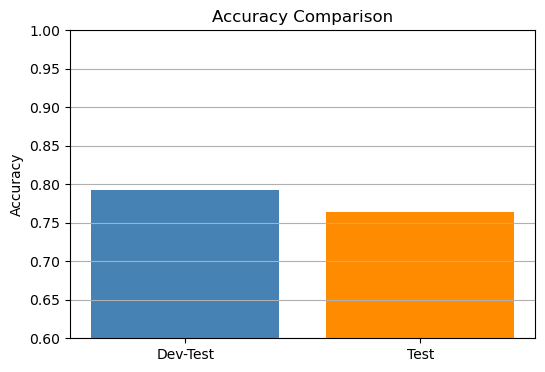

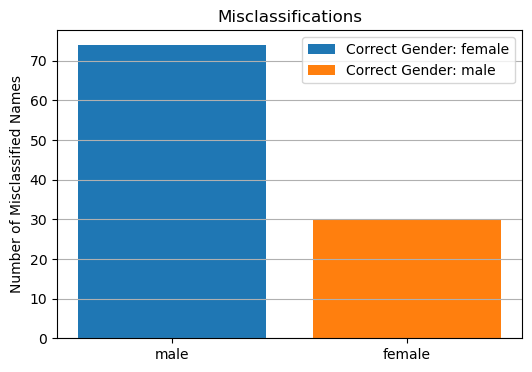

In [15]:

import matplotlib.pyplot as plt

# These are the accuracies
accuracies = {
    "Dev-Test": nltk.classify.accuracy(classifier, devtest_feats),
    "Test": nltk.classify.accuracy(classifier, test_feats)
}

# This is the Bar plot of accuracies
plt.figure(figsize=(6, 4))
plt.bar(accuracies.keys(), accuracies.values(), color=['steelblue', 'darkorange'])
plt.ylim(0.6, 1.0)
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.grid(axis='y')
plt.show()

informative = classifier.most_informative_features(10)


# Misclassification Counts Visualizd

import pandas as pd
# errors dataframe
errors_df = pd.DataFrame(errors, columns=["Correct Gender", "Predicted", "Name"])

# How many female names were misclassifed as male and vice versa
error_counts = errors_df.groupby(["Correct Gender", "Predicted"]).size().reset_index(name="Count")

# Here is the Bar plot of count of the misclassification counts
plt.figure(figsize=(6,4))
for correct_gender in error_counts["Correct Gender"].unique():
    subset = error_counts[error_counts["Correct Gender"] == correct_gender]
    plt.bar(subset["Predicted"], subset["Count"], label=f"Correct Gender: {correct_gender}")

plt.ylabel("Number of Misclassified Names")
plt.title("Misclassifications")
plt.legend()
plt.grid(axis='y')
plt.show()

## Final Evaluation and Comparison

After evaluating our final classifier, we found that the accuracy on this test set is really close to the dev-test accuracy, and we expected that. This small difference indicates that the classifier generalizes well enough and has not overfitted the dev-test set.

A small drop in test accuracy is common and acceptable. If the test set accuracy had dropped significantly, it would have indicated overfitting. The consistent performance here confirms that the features selected (such as last letter, name length, vowel/consonant counts) are all useful and generally acceptable.

### Error Analysis

Upon inspecting the misclassified names, we notice that some names like "Amadel" or "Cyb" or "Miran" are gender-ambiguous and could belong to either gender. This highlights the limitation of using only name-based features and we definitely see potential value in adding external features.
